# Electric Field Challenge 
- By: Peggy Chen 
- Date: March 6, 2025 
- The goal of this program is to complete the given exercises modeling particles that emit charges and their associated electric fields. 

In [1]:
# Import libraries 
import numpy as np
import matplotlib.pyplot as plt

### Activity 0 

Plot the electric field due to two point charges in the region between x=-0.5m to x=0.5m and y=-0.5m to y=0.5m. Charge 1 has a charge +50 microcoulombs at (-0.1m, 0.2m). Charge 2 has a charge -75 microcoulombs at (0.2m, -0.3m). Your code should not place any arrows at the location of the point charges but should indicate the positive charge with a red circle and the negative charge with a blue circle. (if you want to debate/change the color of the charges, you can, but then you should also include a legend in your plot to let the user know the difference between positive and negative) 

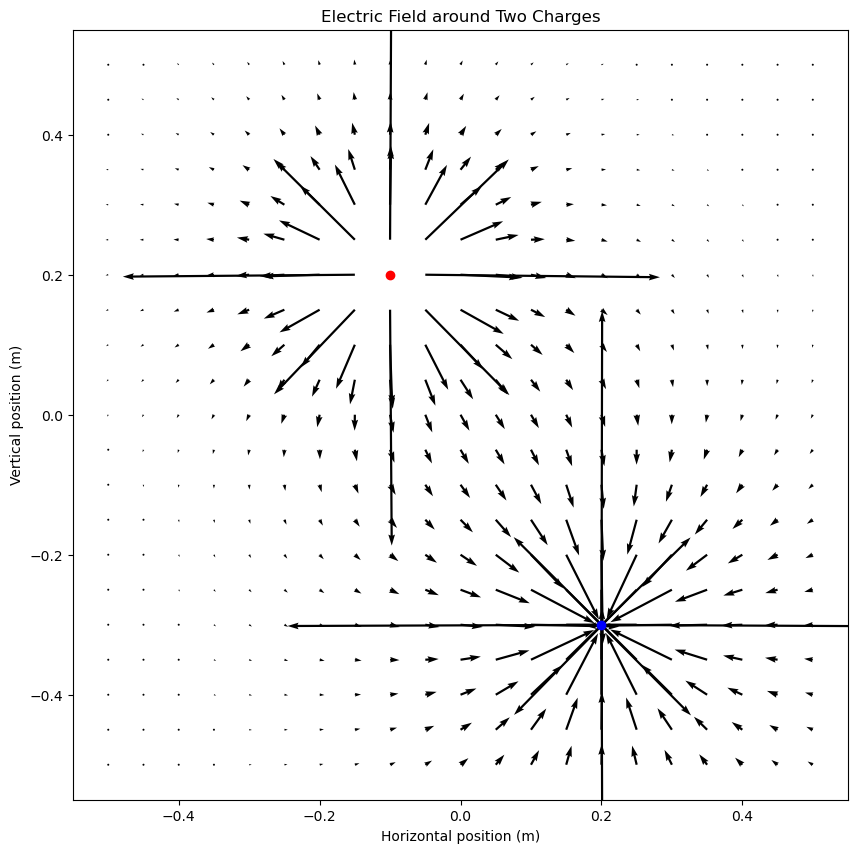

In [2]:
# We will consider the electric field around two particles 
# Given values 
q1_rad = 0.01 #m, Radius of the first particle 
q1_pos = np.array([-0.1,0.2]) #m, Position of the first particle 
q1 = 5e-5 #C, Charge of the first particle 

q2_rad = 0.01 #m, Radius of the first particle 
q2_pos = np.array([0.2,-0.3]) #m, Position of the first particle 
q2 = -7.5e-5 #C, Charge of the first particle 

k = 9e9 #Nm^2/C^2, Coulomb's Constant variable  

# Creating a grid 
x=np.linspace(-0.5,0.5,21) #m, Coordinate grid 1 m wide, with 20 spaces 
y=np.linspace(-0.5,0.5,21) #m, Coordinate grid 1 m wide, with 20 spaces 

X,Y = np.meshgrid(x,y) # Creates our coordinate grid

# Fills up matrix with zero values - and shape of the grid previously determined with np.linspace function 
# We can overwrite later since they are all uniform 
e_1x = np.zeros(X.shape) 
e_1y = np.zeros(Y.shape) 
e_2x = np.zeros(X.shape) 
e_2y = np.zeros(Y.shape) 

# Define function 
def Gfield(q,q_rad,ppos,xpos,ypos): # Function requiring - charge, radius of particle emitting charge, position of charge, and position on field 

    # Find the 'r' vector and other information 
    rx = xpos - ppos[0] # Horizontal distance between the grid point and the charge (x direction) 
    ry = ypos - ppos[1] # Vertical distance between grid point and charge (y) 
    r = np.array([rx, ry]) #m, Component form of vector r 
    rmag = np.linalg.norm(r) # Magnitude of r vector 

    # If the coordinates are inside the charge, we define the strength of the field as zero for simplicity 
    if rmag < q_rad: 
        return (0,0) # Returning efield of 0 inside the charge 
    
    else:
        rhat = r / rmag # Defining unit vector rhat 
        emag = k * q / rmag**2 #m/s/s, Magnitude of the efield - negative sign reverses direction of r vector 
        # Since the quiver function works on a component - not vector - basis, we split apart x and y of efield values  
        ex = emag * rhat[0] # Horizontal magnitude and direction of efield. Can also use gmag * (rx / rmag) or gmag 
        ey = emag * rhat[1] # Vertical magnitude and direction of efield 
        return (ex, ey) # Returning components of the vector (almost like parametrics) 

# This chunk of code runs the function over every point in our defined space, defining u and v in the process
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        e_1x[i,j],e_1y[i,j] = Gfield(q1,q1_rad,q1_pos,X[i,j],Y[i,j]) # Positive charge efield 
        e_2x[i,j],e_2y[i,j] = Gfield(q2,q2_rad,q2_pos,X[i,j],Y[i,j]) # Negative charge efield 

u = e_1x + e_2x #m/s/s, x components of efields added 
v = e_1y + e_2y #m/s/s, y component of efields asdded 

# Plot stuff        
plt.figure(figsize=(10,10)) # Sets figure size 
plt.quiver(X,Y,u,v) # Quiver plot for all points determined via linspace 
plt.scatter(-0.1,0.2, color = 'r') # Plots the positive charge 
plt.scatter(0.2,-0.3, color = 'b') # Plots negative charge 
plt.title('Electric Field around Two Charges')
plt.xlabel('Horizontal position (m)')
plt.ylabel('Vertical position (m)')
plt.show()

### Activity 1: Zero field 

*When the two particles have charges of equal magnitude but opposite signs, can you find a point where their total electric field is zero? If so, show where in the code. If not, explain why.*

**Answer:** When two particles have equal magnitude and opposite charges, there will never be a point where the total electric field is zero. The fields on either side of a charges will always be too far from the other particle to be able to influenced enough for their respective pulls to cancel out. This is in part due to the inverse square relationship that field strength and distance play. At the same time, any point in between the two charges will actually have double magnitude, because the negative in the direction will cancel out with the negative from one of the charges. This is because any point in between the charges will have two r vectors: one for the positive and one for the negative charge. The directions of these two will be the opposite, so when you have two negatives, they end up being a positive, which is why the field is so strong between the charges. 

I prove this in Part 1 (top right) of a picture of my calculations I inserted. 

*When the two particles have charges of different magnitude but opposite signs, where can you find points where their total electric field is zero? Use the code to demonstrate.* 

**Answer:** There is a point where the field strength is zero for two opposite charged particles. Using the formula for electric field strength, I calculated that the direction of both r vectors have to be the same, or else the double negative would turn into a positive, an effect I detailed in my previous response. This also makes sense because the zero electric field strength point would have to have two field vectors - one from each charge - to perfectly balance the effect of each. The only way for this to happen is for the point to be on the line intersecting both charges, and be on one of the sides. 

Another value I needed to derive the solution was what I called lambda, or $\lambda$, which represents the scale factor to get from one charge's magnitude to the other's. To make things easier, I made mine, $\lambda = 2$. From there, it was largely algebra. The final section of my Part 2 calculations generalize which side the zero field point will land on. 

In Part 3, I add my own values in. In my paper, r1 and r2 represent the vectors from q1 and q1 to the zero field point, respectively. After identifying the magnitude of d1, the distance from q1 to our point, I used distance formula to find all possible solutions - which means a circle! All I did finally was solve for the intersection of the circle and line that went through both charges. I used Mathematica, but also graphed in Desmos to confirm. 

![Graph of how I found my solution](https://github.com/chen25p/compphysics/blob/main/Intersect_proof.png?raw=true) 

I had two solutions, but only one of them was on the part of the line that I knew it must have had to be on. That was my solution, yay! This was why Part 2 was important, as it gave me context to distinguish between our actual and extraneous answers. 

To check, I plugged in this point into the Efield equation, and added them. The value of the electric field was close to zero, so I knew this was around where my point was! Since I rounded off some values, it wasn't perfect, but when I graph it, the streamplot also acts accordingly. 

![Image](https://github.com/chen25p/compphysics/blob/main/ZeroEfieldCalculations.jpg?raw=true)


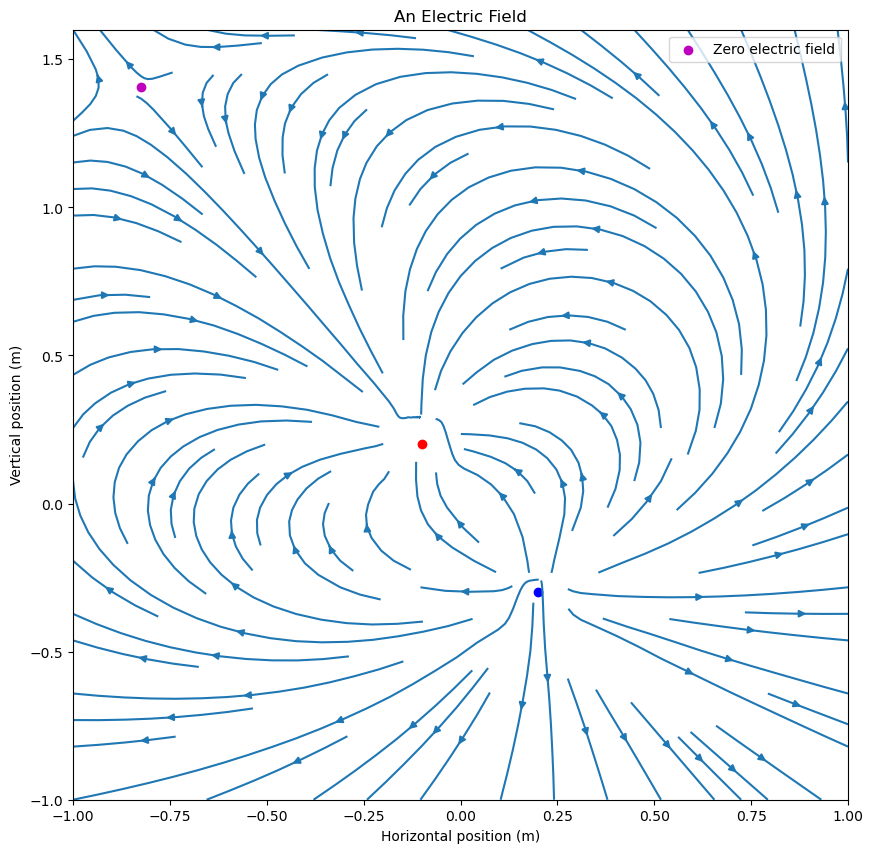

In [3]:
# We will consider the electric field around two particles 
# Given values 
q1_rad = 0.01 #m, Radius of the first particle 
q1_pos = np.array([-0.1,0.2]) #m, Position of the first particle 
q1 = -5e-5 #C, Charge of the first particle 

q2_rad = 0.01 #m, Radius of the second particle 
q2_pos = np.array([0.2,-0.3]) #m, Position of the second particle 
q2 = 10e-5 #C, Charge of the second particle 

k = 9e9 #Nm^2/C^2, Coulomb's Constant variable  

# Creating a grid 
x=np.linspace(-1,1,21) #m, Coordinate grid 2 m wide, with 20 spaces 
y=np.linspace(-1,1.6,21) #m, Coordinate grid 2.6 m wide, with 20 spaces to accommodate for that zero efield point  

X,Y = np.meshgrid(x,y) # Creates our coordinate grid 

# Fills up matrix with zero values - and shape of the grid previously determined with np.linspace function 
# We can overwrite later since they are all uniform 
# Charge 1 matrices 
e_1x = np.zeros(X.shape) 
e_1y = np.zeros(Y.shape) 
# Charge 2 matrices 
e_2x = np.zeros(X.shape) 
e_2y = np.zeros(Y.shape) 

# Define function 
def Efield(q,q_rad,ppos,xpos,ypos): # Function requiring - charge, radius of particle emitting charge, position of charge, and position on field 

    # Find the 'r' vector and other information. ppos is the position of q1 or q1, depending on which round we are doing the calculation on 
    rx = xpos - ppos[0] # Horizontal distance between the grid point and the charge (x direction) 
    ry = ypos - ppos[1] # Vertical distance between grid point and charge (y) 
    r = np.array([rx, ry]) #m, Component form of vector r 
    rmag = np.linalg.norm(r) # Magnitude of r vector 

    # If the coordinates are inside the particle, we define the strength of the field as zero for simplicity 
    if rmag < q_rad: 
        return (0,0) # Returning electric field of 0 inside the particle 
    
    else:
        rhat = r / rmag # Defining unit vector rhat 
        emag = k * q / rmag**2 #m/s/s, Magnitude of the efield - negative sign reverses direction of r vector 
        # Since the streamplot function works on a component - not vector - basis, we split apart x and y of efield values  
        ex = emag * rhat[0] # Horizontal magnitude and direction of efield. Can also use emag * (rx / rmag) or emag 
        ey = emag * rhat[1] # Vertical magnitude and direction of efield 
        return (ex, ey) # Returning components of the vector (almost like parametrics) 

# This chunk of code runs the function over every point in our defined space, defining u and v in the process
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        e_1x[i,j],e_1y[i,j] = Efield(q1,q1_rad,q1_pos,X[i,j],Y[i,j]) # Positive charge efield 
        e_2x[i,j],e_2y[i,j] = Efield(q2,q2_rad,q2_pos,X[i,j],Y[i,j]) # Negative charge efield 

u = e_1x + e_2x #m/s/s, x components of efield added together 
v = e_1y + e_2y #m/s/s, y components of efield added together 

# Plot stuff        
plt.figure(figsize=(10,10)) # Sets figure size 
plt.streamplot(X,Y,u,v) # Creates field lines of the efield 
plt.scatter(-0.82426,1.40711, color = 'm', label = 'Zero electric field') # Plots the zero electric field point 
plt.scatter(-0.1,0.2, color = 'r') # Plots original positive charge 
plt.scatter(0.2,-0.3, color = 'b') # Plots original negative charge 
plt.title('An Electric Field') # Adds title 
# Adds axes labels 
plt.xlabel('Horizontal position (m)') 
plt.ylabel('Vertical position (m)')
plt.legend() # So we know what the dot represents 
plt.show() 

In [67]:
# Shows that my efield calculations are correct! The values are near the same, except negative, so they cancel each other out to approximately zero 
print(Gfield(q1,q1_rad,q1_pos,-0.82426,1.40711))
print(Gfield(q2,q2_rad,q2_pos,-0.82426,1.40711))

(np.float64(116831.77244168997), np.float64(-194721.2338553674))
(np.float64(-116832.01330259038), np.float64(194721.16281899626))


### Activity 2: Quadrupole 

Add two more charges to the code, so that all four of the charges (of the same magnitude) form a square with the same charges in opposite corners. This arrangement is called a quadrupole. What does this arrangement’s electric field look like? Can you explain why? 

**Answer:** Firstly, the direction that particles tend to travel in this field is from positive to negative. From a mathematical perspective, this is because the vector r, representing distance and direction from the positive particle to any point on the field will be the opposite of the vector from the negative particle to any point on the field. Then, the negative charge essentially cancels out the negative from the position vector, creating two vectors in the same direction, with the magnitudes adding to each other. This means the field doesn't show a reversal in direction - the two vectors generally agree. Although this varies depending on location, it generally is true (with special exceptions to the diagonals), and forms the overall pattern of charges being attracted to the negative particles. 

The fanning pattern that creates the clover-like shape is a result of the same charge along the diagonal. Since the positively charged particle is both attracted to the negative and repelled by the positive, it will take a curve path that still takes it to the opposite charge but maximizes distance from the same charge. 

The symmetry makes sense because mathematically, we have two times the formula for the dipole electric field in terms of charges. The only difference is the different positions for the two new particles. 

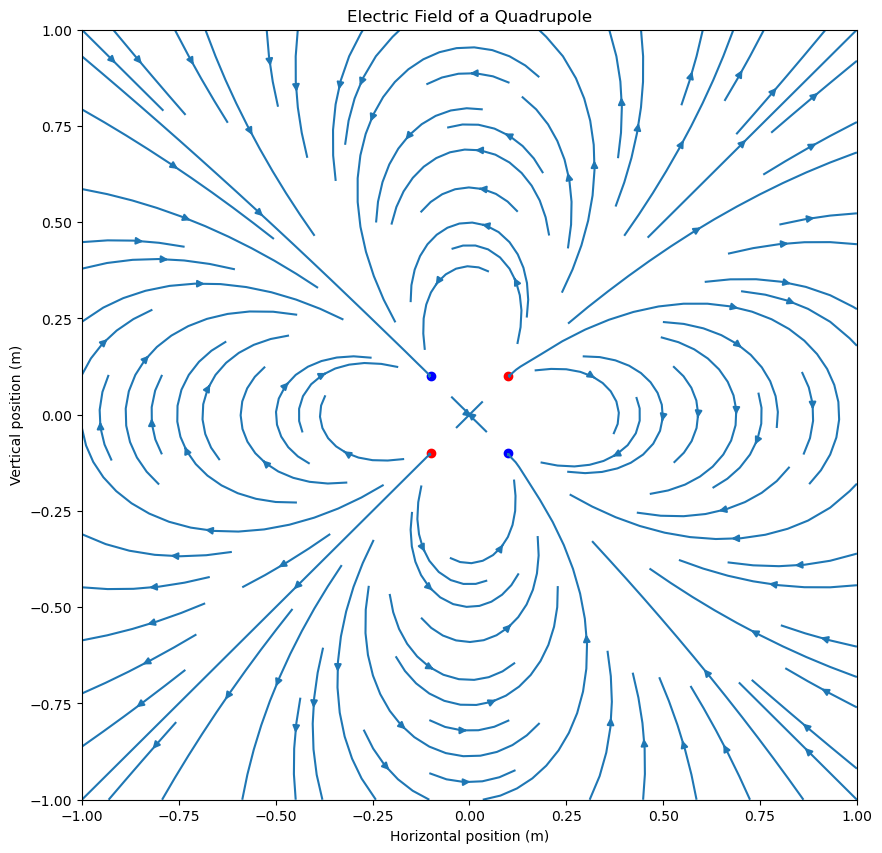

In [73]:
# We will consider the electric field around two particles 
# Given values 
q1_rad = 0.01 #m, Radius of the first particle 
q1_pos = np.array([0.1,0.1]) #m, Position of the first particle 
q1 = 5e-5 #C, Charge of the first particle 

q2_rad = 0.01 #m, Radius of the second particle 
q2_pos = np.array([-0.1,0.1]) #m, Position of the second particle 
q2 = -5e-5 #C, Charge of the second particle 

q3_rad = 0.01 #m, Radius of the third particle 
q3_pos = np.array([-0.1,-0.1]) #m, Position of the third particle 
q3 = 5e-5 #C, Charge of the third particle 

q4_rad = 0.01 #m, Radius of the fourth particle 
q4_pos = np.array([0.1,-0.1]) #m, Position of the fourth particle 
q4 = -5e-5 #C, Charge of the fourth particle 

k = 9e9 #Nm^2/C^2, Coulomb's Constant variable  

# Creating a grid 
x=np.linspace(-1,1,61) #m, Coordinate grid 2 m long, with 60 spaces 
y=np.linspace(-1,1,61) #m, Coordinate grid 2 m long, with 60 spaces 

X,Y = np.meshgrid(x,y) # Creates our coordinate grid

# Fills up matrix with zero values - and shape of the grid previously determined with np.linspace function 
# We can overwrite later since they are all uniform 

# Charge 1 matrices 
e_1x = np.zeros(X.shape) 
e_1y = np.zeros(Y.shape) 
# Charge 2 matrices 
e_2x = np.zeros(X.shape) 
e_2y = np.zeros(Y.shape) 
# Charge 3 matrices 
e_3x = np.zeros(X.shape) 
e_3y = np.zeros(Y.shape) 
# Charge 4 matrices 
e_4x = np.zeros(X.shape) 
e_4y = np.zeros(Y.shape) 

# Define function 
def Efield(q,q_rad,ppos,xpos,ypos): # Function requiring - charge, radius of particle emitting charge, position of charge, and position on field 

    # Find the 'r' vector and other information 
    rx = xpos - ppos[0] # Horizontal distance between the grid point and the charge (x direction) 
    ry = ypos - ppos[1] # Vertical distance between grid point and charge (y) 
    r = np.array([rx, ry]) #m, Component form of vector r 
    rmag = np.linalg.norm(r) # Magnitude of r vector 

    # If the coordinates are inside the charge, we define the strength of the field as zero for simplicity 
    if rmag < q_rad: 
        return (0,0) # Returning efield of 0 inside the charge 
    
    else:
        rhat = r / rmag # Defining unit vector rhat 
        emag = k * q / rmag**2 #m/s/s, Magnitude of the efield - negative sign reverses direction of r vector 
        # Since the streamplot function works on a component - not vector - basis, we split apart x and y of efield values  
        ex = emag * rhat[0] # Horizontal magnitude and direction of efield. Can also use gmag * (rx / rmag) or gmag 
        ey = emag * rhat[1] # Vertical magnitude and direction of efield 
        return (ex, ey) # Returning components of the vector (almost like parametrics) 

# This chunk of code runs the function over every point in our defined space, defining u and v in the process
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        e_1x[i,j],e_1y[i,j] = Efield(q1,q1_rad,q1_pos,X[i,j],Y[i,j]) # Electric field of particle 1 
        e_2x[i,j],e_2y[i,j] = Efield(q2,q2_rad,q2_pos,X[i,j],Y[i,j]) # Electric field of particle 2 
        e_3x[i,j],e_3y[i,j] = Efield(q3,q3_rad,q3_pos,X[i,j],Y[i,j]) # Electric field of particle 3 
        e_4x[i,j],e_4y[i,j] = Efield(q4,q4_rad,q4_pos,X[i,j],Y[i,j]) # Electric field of particle 4 

u = e_1x + e_2x + e_3x + e_4x #m/s/s, x component of all efields 
v = e_1y + e_2y + e_3y + e_4y #m/s/s, y component of all efields 

# Plot stuff        
plt.figure(figsize=(10,10)) # Sets figure size 
plt.streamplot(X,Y,u,v) # Graphs efield lines 
# Plots all four charges in the quadrupole 
plt.scatter(0.1,0.1, color = 'r')
plt.scatter(-0.1,-0.1, color = 'r')
plt.scatter(-0.1,0.1, color = 'b')
plt.scatter(0.1,-0.1, color = 'b') 
plt.title('Electric Field of a Quadrupole')
plt.xlabel('Horizontal position (m)')
plt.ylabel('Vertical position (m)')
plt.show()

### Activity 3: Circle 

Add charges to the code, so that all the charges have the same sign and form a circle. What does the electric field look like inside and outside the circle? Can you explain why? 

**Answer:** For the circle of positively charged particles, we can clearly see all charges point outward outside the circle, while inside the circle charges point to the origin. The two diagonal lines inside the circle appear to be pointing outward, but they are actually long in magnitude and happen to extend so it appears like that. What I essentially mean is, the arrows here are so long that instead of pointing truly in the center they cross over to the other side looking like the arrows are pointing outward inside the ring when they are truly just too long to accommodate inside the radius. 

This makes sense when we consider that fields flow from positive to negative as our quadrupole tell us. However, mathematically, the behavior also aligns because when you have a positive charge and the r vector points outward, then the electric field will have the same behavior. Since the r vector is created by subtracting the particle from a point in the field, we know that for the positions of the field strength and direction to align, the vector must be greater in magnitude yet have the same postive/negative direction as the particle in question. Although we have 16 particles to account for, the more distance particles don't exert as much an influence because we are dividing by such a larger distance squared to find the field strength. 

Inside the circle, the r vector from any particle to any point will result in an inward pointing vector. This is why all the locations inside the circle of particles points inward - the direction is controlled by the r vector. 

A ring of opposite charge particles would have the same behavior, only reversed. Mathematically, this is equivalent to adding a negative sign to reverse all the reasoning we previously mentioned. This also indicates how charges flow from positive to negative; charges outside the circle point in and charges inside the circle point out.  

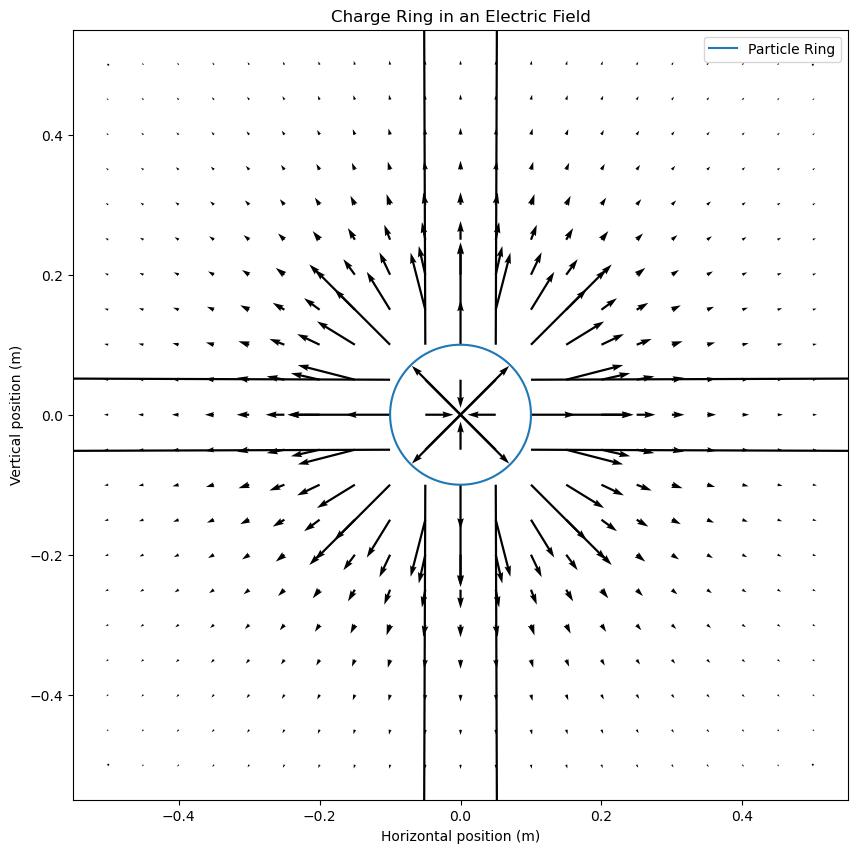

In [74]:
# We will consider the electric field around two particles 
a = 0.1 
q1 = 5e-5 #C, Charge of the particle 
q1_rad = 0.001 #m, Radius of the particle 

# Given axes 
q1_pos = np.array([a,0]) #m, Position of the particle 
q2_pos = np.array([0,a]) #m, Position of the particle 
q3_pos = np.array([-a,0]) #m, Position of the particle 
q4_pos = np.array([0,-a]) #m, Position of the particle 

# Given values in first quadrant 
q1_1_pos = np.array([a*np.cos(np.pi/6),a*np.sin(np.pi/6)]) #m, Position 
q1_2_pos = np.array([a*np.cos(np.pi/4),a*np.sin(np.pi/4)]) #m, Position 
q1_3_pos = np.array([a*np.cos(np.pi/3),a*np.sin(np.pi/3)]) #m, Position 

# Given values in second quadrant 
q2_1_pos = np.array([-a*np.cos(np.pi/6),a*np.sin(np.pi/6)]) #m, Position 
q2_2_pos = np.array([-a*np.cos(np.pi/4),a*np.sin(np.pi/4)]) #m, Position 
q2_3_pos = np.array([-a*np.cos(np.pi/3),a*np.sin(np.pi/3)]) #m, Position 

# Given values in third quadrant 
q3_1_pos = np.array([-a*np.cos(np.pi/6),-a*np.sin(np.pi/6)]) #m, Position 
q3_2_pos = np.array([-a*np.cos(np.pi/4),-a*np.sin(np.pi/4)]) #m, Position 
q3_3_pos = np.array([-a*np.cos(np.pi/3),-a*np.sin(np.pi/3)]) #m, Position 

# Given values in fourth quadrant 
q4_1_pos = np.array([a*np.cos(np.pi/6),-a*np.sin(np.pi/6)]) #m, Position 
q4_2_pos = np.array([a*np.cos(np.pi/4),-a*np.sin(np.pi/4)]) #m, Position 
q4_3_pos = np.array([a*np.cos(np.pi/3),-a*np.sin(np.pi/3)]) #m, Position 

k = 9e9 #Nm^2/C^2, Coulomb's Constant variable  

# Creating a grid 
x=np.linspace(-0.5,0.5,21) #m, Coordinate grid 1 m wide, with 20 spaces 
y=np.linspace(-0.5,0.5,21) #m, Coordinate grid 1 m wide, with 20 spaces 

X,Y = np.meshgrid(x,y) # Creates our coordinate grid

# Fills up matrix with zero values - and shape of the grid previously determined with np.linspace function 
# We can overwrite later since they are all uniform 
e_1x = np.zeros(X.shape) 
e_1y = np.zeros(Y.shape) 
e_2x = np.zeros(X.shape) 
e_2y = np.zeros(Y.shape) 
e_3x = np.zeros(X.shape) 
e_3y = np.zeros(Y.shape) 
e_4x = np.zeros(X.shape) 
e_4y = np.zeros(Y.shape) 

e_1_1x = np.zeros(X.shape) 
e_1_1y = np.zeros(Y.shape) 
e_2_1x = np.zeros(X.shape) 
e_2_1y = np.zeros(Y.shape) 
e_3_1x = np.zeros(X.shape) 
e_3_1y = np.zeros(Y.shape) 

e_1_2x = np.zeros(X.shape) 
e_1_2y = np.zeros(Y.shape) 
e_2_2x = np.zeros(X.shape) 
e_2_2y = np.zeros(Y.shape) 
e_3_2x = np.zeros(X.shape) 
e_3_2y = np.zeros(Y.shape) 

e_1_3x = np.zeros(X.shape) 
e_1_3y = np.zeros(Y.shape) 
e_2_3x = np.zeros(X.shape) 
e_2_3y = np.zeros(Y.shape) 
e_3_3x = np.zeros(X.shape) 
e_3_3y = np.zeros(Y.shape) 

e_1_4x = np.zeros(X.shape) 
e_1_4y = np.zeros(Y.shape) 
e_2_4x = np.zeros(X.shape) 
e_2_4y = np.zeros(Y.shape) 
e_3_4x = np.zeros(X.shape) 
e_3_4y = np.zeros(Y.shape) 

# Define function 
def Gfield(q,q_rad,ppos,xpos,ypos): # Function requiring - charge, radius of particle emitting charge, position of charge, and position on field 

    # Find the 'r' vector and other information 
    rx = xpos - ppos[0] # Horizontal distance between the grid point and the charge (x direction) 
    ry = ypos - ppos[1] # Vertical distance between grid point and charge (y) 
    r = np.array([rx, ry]) #m, Component form of vector r 
    rmag = np.linalg.norm(r) # Magnitude of r vector 

    # If the coordinates are inside the charge, we define the strength of the field as zero for simplicity 
    if rmag < q_rad: 
        return (0,0) # Returning efield of 0 inside the Earth 
    
    else:
        rhat = r / rmag # Defining unit vector rhat 
        emag = k * q / rmag**2 #m/s/s, Magnitude of the efield - negative sign reverses direction of r vector 
        # Since the quiver function works on a component - not vector - basis, we split apart x and y of efield values  
        ex = emag * rhat[0] # Horizontal magnitude and direction of efield. Can also use gmag * (rx / rmag) or gmag 
        ey = emag * rhat[1] # Vertical magnitude and direction of efield 
        return (ex, ey) # Returning components of the vector (almost like parametrics) 

# This chunk of code runs the function over every point in our defined space, defining u and v in the process
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        e_1x[i,j],e_1y[i,j] = Gfield(q1,q1_rad,q1_pos,X[i,j],Y[i,j]) # Electric field of particle 1 
        e_2x[i,j],e_2y[i,j] = Gfield(q1,q1_rad,q2_pos,X[i,j],Y[i,j]) # Electric field of particle 2 
        e_3x[i,j],e_3y[i,j] = Gfield(q1,q1_rad,q3_pos,X[i,j],Y[i,j]) # Electric field of particle 3 
        e_4x[i,j],e_4y[i,j] = Gfield(q1,q1_rad,q4_pos,X[i,j],Y[i,j]) # Electric field of particle 4 

        e_1_1x[i,j],e_1_1y[i,j] = Gfield(q1,q1_rad,q1_1_pos,X[i,j],Y[i,j]) # Electric field 
        e_1_2x[i,j],e_1_2y[i,j] = Gfield(q1,q1_rad,q2_1_pos,X[i,j],Y[i,j]) # Electric field 
        e_1_3x[i,j],e_1_3y[i,j] = Gfield(q1,q1_rad,q3_1_pos,X[i,j],Y[i,j]) # Electric field 
        e_1_4x[i,j],e_1_4y[i,j] = Gfield(q1,q1_rad,q4_1_pos,X[i,j],Y[i,j]) # Electric field 

        e_2_1x[i,j],e_2_1y[i,j] = Gfield(q1,q1_rad,q1_2_pos,X[i,j],Y[i,j]) # Electric field 
        e_2_2x[i,j],e_2_2y[i,j] = Gfield(q1,q1_rad,q2_2_pos,X[i,j],Y[i,j]) # Electric field 
        e_2_3x[i,j],e_2_3y[i,j] = Gfield(q1,q1_rad,q3_2_pos,X[i,j],Y[i,j]) # Electric field 
        e_2_4x[i,j],e_2_4y[i,j] = Gfield(q1,q1_rad,q4_2_pos,X[i,j],Y[i,j]) # Electric field 

        e_3_1x[i,j],e_3_1y[i,j] = Gfield(q1,q1_rad,q1_3_pos,X[i,j],Y[i,j]) # Electric field 
        e_3_2x[i,j],e_3_2y[i,j] = Gfield(q1,q1_rad,q2_3_pos,X[i,j],Y[i,j]) # Electric field 
        e_3_3x[i,j],e_3_3y[i,j] = Gfield(q1,q1_rad,q3_3_pos,X[i,j],Y[i,j]) # Electric field 
        e_3_4x[i,j],e_3_4y[i,j] = Gfield(q1,q1_rad,q4_3_pos,X[i,j],Y[i,j]) # Electric field 

u = e_1x + e_2x + e_3x + e_4x + e_1_1x + e_1_2x + e_1_3x + e_1_4x + e_2_1x + e_2_2x + e_2_3x + e_2_4x + e_3_1x + e_3_2x + e_3_3x + e_3_4x  #m/s/s 

v = e_1y + e_2y + e_3y + e_4y + e_1_1y + e_1_2y + e_1_3y + e_1_4y + e_2_1y + e_2_2y + e_2_3y + e_2_4y + e_3_1y + e_3_2y + e_3_3y + e_3_4y #m/s/s 

# Plot stuff        
plt.figure(figsize=(10,10)) # Sets figure size 
plt.quiver(X,Y,u,v) # Quiver plot 
plt.plot(a*np.cos(np.linspace(0,np.pi*2,361)),a*np.sin(np.linspace(0,np.pi*2,361)), label = 'Particle Ring') # Plots circle to represent the ring (all locations are a circle of radius a = 0.1 m) 
plt.title('Charge Ring in an Electric Field') # Adds title 
# Axes labels 
plt.xlabel('Horizontal position (m)')
plt.ylabel('Vertical position (m)')
plt.legend() # To identify what the circle represents 
plt.show()

### Activity 4: Parallel Lines 

Arrange 20 charges such that ten positive charges form a line and another ten negative charges form a second line parallel to the first. What does the field look like between the lines? Around the edges of the line? Outside the lines? 

**Answer:** The field in between the lines has direction that trend toward the middle, before curving outwards. The behavior for the particles to point toward those of the opposite charge is due to their attraction, and the slanted field lines between the two particle strips is due to the attraction from the entire line of particles. With so many different electric fields, adding them up results in the overall trend of pointing to particles of the opposite charge, but with 20 particles in action, it's easy to see small variations in the exact direction arrows point. 

However, as we move toward the edges of the line, the particles start to slant off more. This is because there are no particles outside of the 2 rows, and thus, near the edge, the influence of the rest of the row isn't as large. The inverse square relationship between field strength and distance amplifies this effect. Eventually, field lines on the very edge branch off completely, as the fields of the other particles aren't strong enough to influence behavior. 

Outside of the lines, the fields also trend outward. This is because if you are located right outside of the line, you are not close enough to be attracted by the opposite charge, since it is "blocked" by a row of the original charge. This is again exemplified by the inverse square relationship, and results in field lines deflecting outward. 

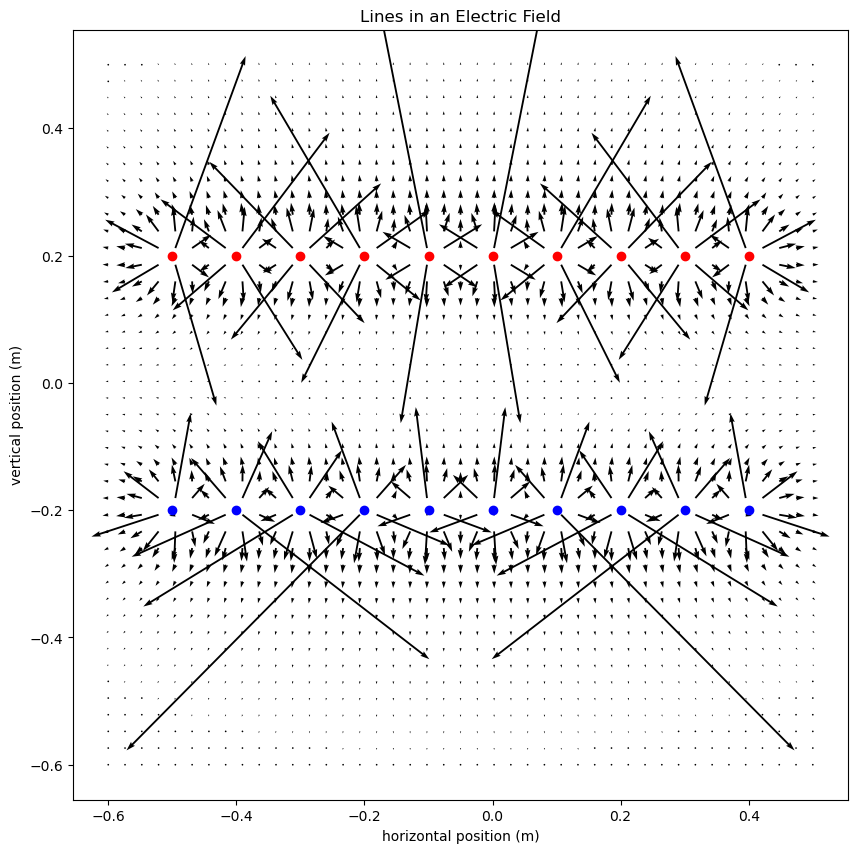

In [75]:
# We will consider the electric field around two particles 
# Given values 
q1 = 5e-5 #C, Charge of the particles 
q1_rad = 0.01 #m, Radius of the first particle 
k = 9e9 #Nm^2/C^2, Coulomb's Constant variable  
h = 0.2 #m, height of the particle 

# Positive charges 
q1_pos = np.array([-0.5,h]) #m 
q2_pos = np.array([-0.4,h]) #m 
q3_pos = np.array([-0.3,h]) #m 
q4_pos = np.array([-0.2,h]) #m 
q5_pos = np.array([-0.1,h]) #m 
q6_pos = np.array([0,h]) #m 
q7_pos = np.array([0.1,h]) #m 
q8_pos = np.array([0.2,h]) #m 
q9_pos = np.array([0.3,h]) #m 
q10_pos = np.array([0.4,h]) #m 

# Negative charges 
q1_negative = np.array([-0.5,-h]) #m 
q2_negative = np.array([-0.4,-h]) #m 
q3_negative = np.array([-0.3,-h]) #m 
q4_negative = np.array([-0.2,-h]) #m 
q5_negative = np.array([-0.1,-h]) #m 
q6_negative = np.array([0,-h]) #m 
q7_negative = np.array([0.1,-h]) #m 
q8_negative = np.array([0.2,-h]) #m 
q9_negative = np.array([0.3,-h]) #m 
q10_negative = np.array([0.4,-h]) #m 

# Creating a grid 
x=np.linspace(-0.6,0.5,43) #m, Coordinate grid in domain and range of our 20 particles, with 41 spaces 
y=np.linspace(-0.6,0.5,43) #m, Coordinate grid in domain and range of our 20 particles, with 41 spaces 

X,Y = np.meshgrid(x,y) # Creates our coordinate grid

# Fills up matrix with zero values - and shape of the grid previously determined with np.linspace function 
# We can overwrite later since they are all uniform 
e_1x = np.zeros(X.shape) 
e_1y = np.zeros(Y.shape) 
e_2x = np.zeros(X.shape) 
e_2y = np.zeros(Y.shape) 
e_3x = np.zeros(X.shape) 
e_3y = np.zeros(Y.shape) 
e_4x = np.zeros(X.shape) 
e_4y = np.zeros(Y.shape) 
e_5x = np.zeros(X.shape) 
e_5y = np.zeros(Y.shape) 
e_6x = np.zeros(X.shape) 
e_6y = np.zeros(Y.shape) 
e_7x = np.zeros(X.shape) 
e_7y = np.zeros(Y.shape) 
e_8x = np.zeros(X.shape) 
e_8y = np.zeros(Y.shape) 
e_9x = np.zeros(X.shape) 
e_9y = np.zeros(Y.shape) 
e_10x = np.zeros(X.shape) 
e_10y = np.zeros(Y.shape) 

e_1x_n = np.zeros(X.shape) 
e_1y_n = np.zeros(Y.shape) 
e_2x_n = np.zeros(X.shape) 
e_2y_n = np.zeros(Y.shape) 
e_3x_n = np.zeros(X.shape) 
e_3y_n = np.zeros(Y.shape) 
e_4x_n = np.zeros(X.shape) 
e_4y_n = np.zeros(Y.shape) 
e_5x_n = np.zeros(X.shape) 
e_5y_n = np.zeros(Y.shape) 
e_6x_n = np.zeros(X.shape) 
e_6y_n = np.zeros(Y.shape) 
e_7x_n = np.zeros(X.shape) 
e_7y_n = np.zeros(Y.shape) 
e_8x_n = np.zeros(X.shape) 
e_8y_n = np.zeros(Y.shape) 
e_9x_n = np.zeros(X.shape) 
e_9y_n = np.zeros(Y.shape) 
e_10x_n = np.zeros(X.shape) 
e_10y_n = np.zeros(Y.shape) 

# Define function 
def Gfield(ppos,xpos,ypos): # Function requiring - charge, radius of particle emitting charge, position of charge, and position on field 

    # Find the 'r' vector and other information 
    rx = xpos - ppos[0] # Horizontal distance between the grid point and the charge (x direction) 
    ry = ypos - ppos[1] # Vertical distance between grid point and charge (y) 
    r = np.array([rx, ry]) #m, Component form of vector r 
    rmag = np.linalg.norm(r) # Magnitude of r vector 

    # If the coordinates are inside the charge, we define the strength of the field as zero for simplicity 
    if rmag < q1_rad: 
        return (0,0) # Returning efield of 0 inside the charge 
    
    else:
        rhat = r / rmag # Defining unit vector rhat 
        emag = k * q1 / rmag**2 #m/s/s, Magnitude of the efield - negative sign reverses direction of r vector 
        # Since the quiver function works on a component - not vector - basis, we split apart x and y of efield values  
        ex = emag * rhat[0] # Horizontal magnitude and direction of efield. Can also use gmag * (rx / rmag) or gmag 
        ey = emag * rhat[1] # Vertical magnitude and direction of efield 
        return (ex, ey) # Returning components of the vector (almost like parametrics) 

# This chunk of code runs the function over every point in our defined space, defining u and v in the process
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        e_1x[i,j],e_1y[i,j] = Gfield(q1_pos,X[i,j],Y[i,j]) # Electric field 
        e_2x[i,j],e_2y[i,j] = Gfield(q2_pos,X[i,j],Y[i,j]) # Electric field 
        e_3x[i,j],e_3y[i,j] = Gfield(q3_pos,X[i,j],Y[i,j]) # Electric field 
        e_4x[i,j],e_4y[i,j] = Gfield(q4_pos,X[i,j],Y[i,j]) # Electric field 
        e_5x[i,j],e_5y[i,j] = Gfield(q5_pos,X[i,j],Y[i,j]) # Electric field 
        e_6x[i,j],e_6y[i,j] = Gfield(q6_pos,X[i,j],Y[i,j]) # Electric field 
        e_7x[i,j],e_7y[i,j] = Gfield(q7_pos,X[i,j],Y[i,j]) # Electric field 
        e_8x[i,j],e_8y[i,j] = Gfield(q8_pos,X[i,j],Y[i,j]) # Electric field 
        e_9x[i,j],e_9y[i,j] = Gfield(q9_pos,X[i,j],Y[i,j]) # Electric field 
        e_10x[i,j],e_10y[i,j] = Gfield(q10_pos,X[i,j],Y[i,j]) # Electric field 
        # Negative ones 
        e_1x_n[i,j],e_1y_n[i,j] = Gfield(q1_negative,X[i,j],Y[i,j]) # Electric field 
        e_2x_n[i,j],e_2y_n[i,j] = Gfield(q2_negative,X[i,j],Y[i,j]) # Electric field 
        e_3x_n[i,j],e_3y_n[i,j] = Gfield(q3_negative,X[i,j],Y[i,j]) # Electric field 
        e_4x_n[i,j],e_4y_n[i,j] = Gfield(q4_negative,X[i,j],Y[i,j]) # Electric field 
        e_5x_n[i,j],e_5y_n[i,j] = Gfield(q5_negative,X[i,j],Y[i,j]) # Electric field 
        e_6x_n[i,j],e_6y_n[i,j] = Gfield(q6_negative,X[i,j],Y[i,j]) # Electric field 
        e_7x_n[i,j],e_7y_n[i,j] = Gfield(q7_negative,X[i,j],Y[i,j]) # Electric field 
        e_8x_n[i,j],e_8y_n[i,j] = Gfield(q8_negative,X[i,j],Y[i,j]) # Electric field 
        e_9x_n[i,j],e_9y_n[i,j] = Gfield(q9_negative,X[i,j],Y[i,j]) # Electric field 
        e_10x_n[i,j],e_10y_n[i,j] = Gfield(q10_negative,X[i,j],Y[i,j]) # Electric field 

# Sum the efields for each charge 
u = e_1x + e_2x + e_3x + e_4x + e_5x + e_6x + e_7x + e_8x + e_9x + e_10x + e_1x_n + e_2x_n + e_3x_n + e_4x_n + e_5x_n + e_6x_n + e_7x_n + e_8x_n + e_9x_n + e_10x_n #m/s/s 
v = e_1y + e_2y + e_3y + e_4y + e_5y + e_6y + e_7y + e_8y + e_9y + e_10y + e_1y_n + e_2y_n + e_3y_n + e_4y_n + e_5y_n + e_6y_n + e_7y_n + e_8y_n + e_9y_n + e_10y_n #m/s/s 

# Plot stuff        
plt.figure(figsize=(10,10)) # Sets figure size 
plt.quiver(X,Y,u,v) # Adds quiver plot 
# Graphs positive charges 
plt.scatter(-0.5,h, color = 'r')
plt.scatter(-0.4,h, color = 'r') 
plt.scatter(-0.3,h, color = 'r')
plt.scatter(-0.2,h, color = 'r')
plt.scatter(-0.1,h, color = 'r')
plt.scatter(0,h, color = 'r')
plt.scatter(0.1,h, color = 'r')
plt.scatter(0.2,h, color = 'r')
plt.scatter(0.3,h, color = 'r')
plt.scatter(0.4,h, color = 'r')
# Graphs negative charges 
plt.scatter(-0.5,-h, color = 'b')
plt.scatter(-0.4,-h, color = 'b') 
plt.scatter(-0.3,-h, color = 'b')
plt.scatter(-0.2,-h, color = 'b')
plt.scatter(-0.1,-h, color = 'b')
plt.scatter(0,-h, color = 'b')
plt.scatter(0.1,-h, color = 'b')
plt.scatter(0.2,-h, color = 'b')
plt.scatter(0.3,-h, color = 'b')
plt.scatter(0.4,-h, color = 'b')
plt.title('Line Charges in an Electric Field') # Adds title 
# Axes labels 
plt.xlabel('Horizontal position (m)') 
plt.ylabel('vertical position (m)')
plt.show()